# 分类树

In [90]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1.数据分析处理

In [2]:
wine = load_wine()
# 数据属性
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
#数据维度
wine.data.shape

(178, 13)

In [4]:
#label
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# label 类别
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
df = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

In [10]:
df.columns = feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
                ,'花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸', "标签"]
df.head()

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸,标签
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
酒精                  178 non-null float64
苹果酸                 178 non-null float64
灰                   178 non-null float64
灰的碱性                178 non-null float64
镁                   178 non-null float64
总酚                  178 non-null float64
类黄酮                 178 non-null float64
非黄烷类酚类              178 non-null float64
花青素                 178 non-null float64
颜色强度                178 non-null float64
色调                  178 non-null float64
od280/od315稀释葡萄酒    178 non-null float64
脯氨酸                 178 non-null float64
标签                  178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


### 2.数据划分

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target, test_size = 0.3)

In [13]:
#训练集样本个数
X_train.shape

(124, 13)

In [14]:
#测试样本个数
X_test.shape

(54, 13)

### 3.构建模型
　　决策树在建树时，是靠优化节点来追求一棵优化的树，但最优
的节点能够保证最优的树吗？集成算法被用来解决这个问题：sklearn表示，既然一棵树不能保证最优，那就建更
多的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树？在每次分枝时，不从使用全部特征，而是随
机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了

In [32]:
# 基于信息增益
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                   , random_state=20
#                                    , splitter = "random"
                                  )
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [33]:
# 训练集上的误差率
clf.score(X_train, Y_train)

1.0

In [34]:
# 测试集上的准确率(过拟合)
clf.score(X_test, Y_test)

0.9629629629629629

### 4.可视化

In [35]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
                ,'花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

In [36]:
import graphviz

dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names = feature_name
                                ,class_names = ["清酒","雪梨", "汉斯"]
                                ,filled = True
                                ,rounded = True
                               )

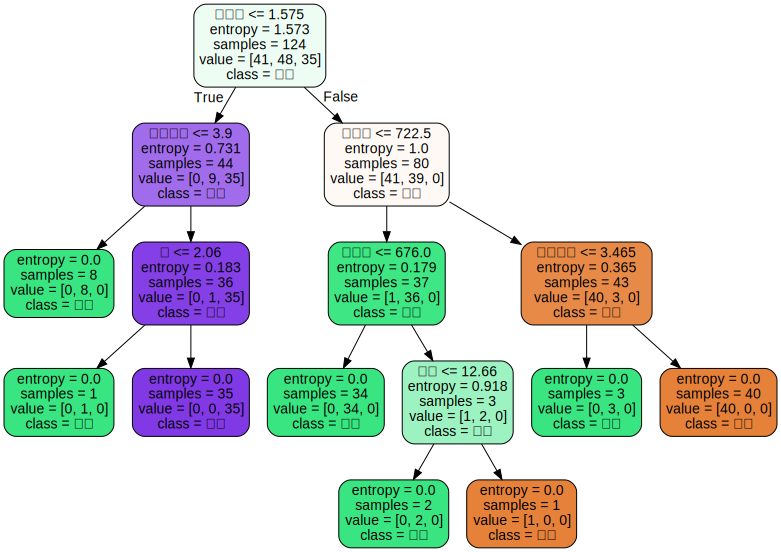

In [37]:
graph = graphviz.Source(dot_data)
graph

In [38]:
# 输出特征选择是选取的重要特征
clf.feature_importances_

array([0.01412346, 0.        , 0.03379717, 0.        , 0.        ,
       0.        , 0.4251714 , 0.        , 0.        , 0.21155668,
       0.        , 0.        , 0.31535129])

In [39]:
# 数据对应特征的特征标签
list(zip(feature_name, clf.feature_importances_)) #[*zip()]

[('酒精', 0.014123456026289814),
 ('苹果酸', 0.0),
 ('灰', 0.033797167098256205),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.425171401703828),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.21155668029084915),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.31535129488077684)]

In [40]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

### 5.决策树剪枝

In [51]:
#　判断模型是否过拟合
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print("train_accuracy: {}\ntest_accuracy: {}".format(train_accuracy, test_accuracy))

train_accuracy: 1.0
test_accuracy: 0.9629629629629629


#### 提升决策树的泛化能力　决策树剪枝

In [99]:
# 为了提升决策树的泛化能力　开始对数据进行剪枝
# 基于信息增益
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=20
#                                    , splitter = "random"
                                  , max_depth = 3
#                                   , min_samples_leaf = 10
                                  , min_samples_split = 40
                                  )
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [100]:
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names = feature_name
                                ,class_names = ["清酒","雪梨", "汉斯"]
                                ,filled = True
                                ,rounded = True
                               )

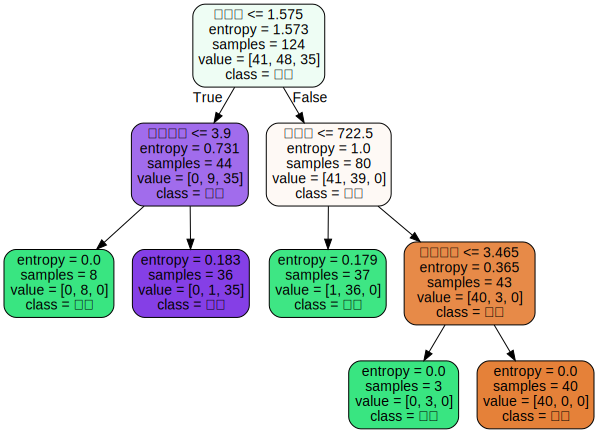

In [101]:
graph = graphviz.Source(dot_data)
graph

In [102]:
train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print("train_accuracy: {}\ntest_accuracy: {}".format(train_accuracy, test_accuracy))

train_accuracy: 0.9838709677419355
test_accuracy: 0.9814814814814815


In [103]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

#### 选择最优的的模型参数

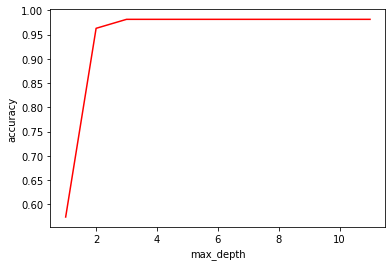

In [104]:
test = [] # 记录测试集的准确率

# 测是最大深度的可能取值
for i in range(1, 12):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=20
    #                                    , splitter = "random"
                                  , max_depth = i
    #                                   , min_samples_leaf = 10
                                  , min_samples_split = 40
                                  )
    clf.fit(X_train, Y_train)
    test.append(clf.score(X_test, Y_test))

    
plt.plot(range(1, 12), test, "r")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

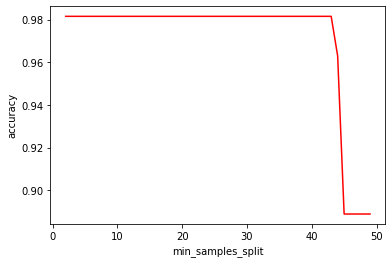

In [106]:
test = [] # 记录测试集的准确率

# 测是最大深度的可能取值
for i in range(2, 50):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=20
    #                                    , splitter = "random"
                                  , max_depth = 3
    #                                   , min_samples_leaf = 10
                                  , min_samples_split = i
                                  )
    clf.fit(X_train, Y_train)
    test.append(clf.score(X_test, Y_test))

    
plt.plot(range(2, 50), test, "r")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

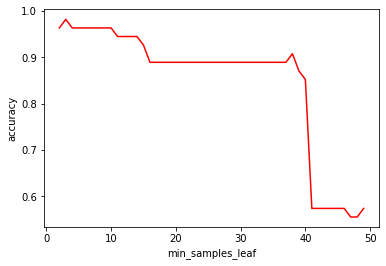

In [107]:
test = [] # 记录测试集的准确率

# 测是最大深度的可能取值
for i in range(2, 50):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=20
    #                                    , splitter = "random"
                                  , max_depth = 3
                                      , min_samples_leaf = i
#                                   , min_samples_split = i
                                  )
    clf.fit(X_train, Y_train)
    test.append(clf.score(X_test, Y_test))

    
plt.plot(range(2, 50), test, "r")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### 6.重要属性和接口

In [108]:
# 返回每一个测试样本所在的叶子节点的额索引
clf.apply(X_test)

array([2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2])

In [111]:
# 返回每一个测试样本的分类/回归的结果
clf.predict(X_test)

array([0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0])

### 参考
[zip()和*zip()](https://www.cnblogs.com/kenny-feng/p/11368477.html)  
[决策树](https://sklearn.apachecn.org/docs/0.21.3/11.html?h=tree)